In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 1. Load the data

In [28]:
df_bike = pd.read_csv('data/train.csv', parse_dates=[0])
df_bike.drop(['casual', 'registered'], axis=1, inplace=True)

In [3]:
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [29]:
df_bike['day'] = df_bike['datetime'].dt.day_name()
df_bike['month'] = df_bike['datetime'].dt.month_name()

In [30]:
df_bike.set_index('datetime', inplace=True)

In [6]:
df_bike.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,Saturday,January
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,Saturday,January


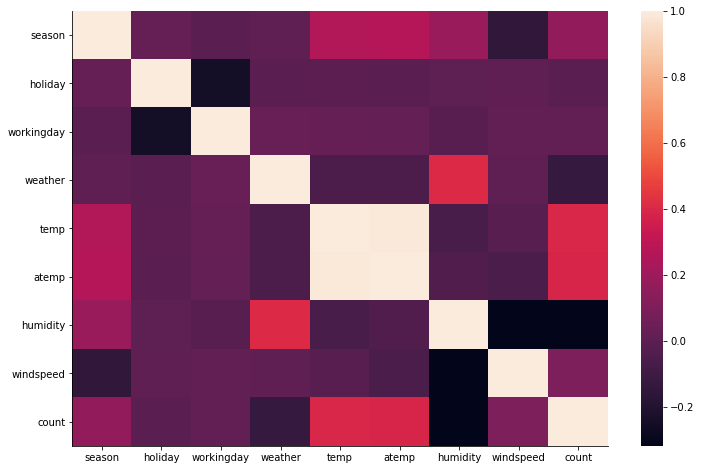

In [31]:
plt.figure(figsize= (12,8))
corr = df_bike.drop(['day', 'month'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr)

sns.despine()

## 1. delete the feeled temperature 'atemp' due tó the high correlation to 'temp'
## 2. cancle out 'humidity due to weak correlation to the counts
## 3. evtl. make a 'holiday' 'workingday' ratio due to the weak correlation between each other

In [32]:
df_bike.drop(['atemp'], axis=1, inplace=True)

In [33]:
df_bike.groupby('day')['count'].agg(['mean', 'std', 'sum']).sort_values(by=['mean'], ascending=False)

,mean,std,sum
day,,,
Friday,197.844343,172.518208,302504
Thursday,197.296201,187.606619,306401
Saturday,196.665404,180.917795,311518
Monday,190.390716,180.943376,295296
Tuesday,189.723847,186.719673,291985
Wednesday,188.411348,190.942004,292226
Sunday,180.839772,167.022145,285546


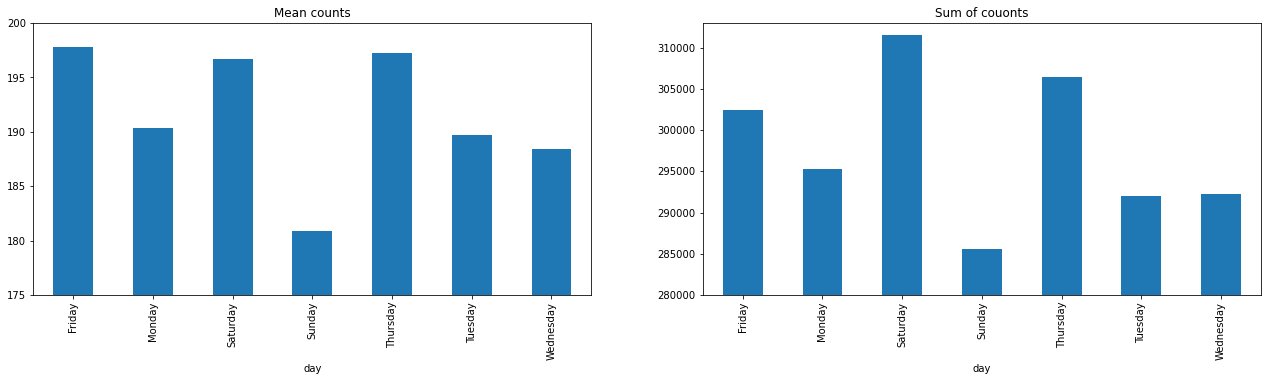

In [34]:
df_bike_days = df_bike.groupby('day')['count'].agg(['mean', 'std', 'sum' ])

fig, axs = plt.subplots(1,2, figsize=(22, 5))
df_bike_days['mean'].plot.bar(ax=axs[0])
#axs[0].set_xticklabels(rotation=60)
axs[0].set_title("Mean counts")
axs[0].set_ylim([175, 200])

df_bike_days['sum'].plot.bar(ax=axs[1])
#axs[1].set_xticklabels(rotation=60)
axs[1].set_title("Sum of couonts")
axs[1].set_ylim([280000, 313000])

plt.show()

In [35]:
df_bike.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,day,month
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16,Saturday,January
2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40,Saturday,January
2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32,Saturday,January
2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13,Saturday,January
2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1,Saturday,January


In [36]:
df_bike['busy_day'] = np.nan

In [37]:
df_bike.loc[df_bike.day == 'Saturday', 'busy_day'] = 2
df_bike.loc[df_bike.day == 'Friday', 'busy_day'] = 2
df_bike.loc[df_bike.day == 'Thursday', 'busy_day'] = 2

df_bike.loc[df_bike.day == 'Monday', 'busy_day'] = 1
df_bike.loc[df_bike.day == 'Tuesday', 'busy_day'] = 1
df_bike.loc[df_bike.day == 'Wednesday', 'busy_day'] = 1

df_bike.loc[df_bike.day == 'Sunday', 'busy_day'] = 0
df_bike.loc[df_bike.holiday == 1, 'busy_day'] = 0



In [38]:
df_bike.groupby('month')['count'].agg(['mean', 'std', 'sum' ]).sort_values(by=['mean'], ascending=False)

,mean,std,sum
month,,,
June,242.031798,199.628690,220733
July,235.325658,184.857337,214617
August,234.118421,197.198461,213516
September,233.805281,208.915910,212529
October,227.699232,204.079411,207434
May,219.459430,189.320173,200147
November,193.677278,165.420965,176440
April,184.160616,182.417619,167402
December,175.614035,155.926050,160160


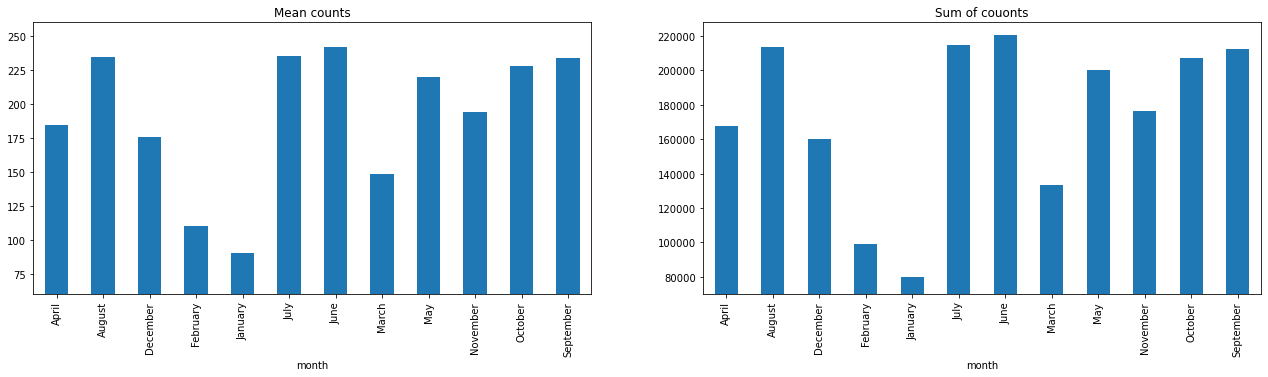

In [39]:
df_bike_months = df_bike.groupby('month')['count'].agg(['mean', 'std', 'sum' ])

fig, axs = plt.subplots(1,2, figsize=(22, 5))
df_bike_months['mean'].plot.bar(ax=axs[0])
axs[0].set_title("Mean counts")
axs[0].set_ylim([60, 260])

df_bike_months['sum'].plot.bar(ax=axs[1])
axs[1].set_title("Sum of couonts")
axs[1].set_ylim([70000, 228000])

plt.show()

In [40]:
df_bike['busy_month'] = np.nan

In [41]:
df_bike.loc[df_bike.month == 'August', 'busy_month'] = 2
df_bike.loc[df_bike.month == 'July', 'busy_month'] = 2
df_bike.loc[df_bike.month== 'June', 'busy_month'] = 2
df_bike.loc[df_bike.month== 'May', 'busy_month'] = 2
df_bike.loc[df_bike.month== 'October', 'busy_month'] = 2
df_bike.loc[df_bike.month== 'September', 'busy_month'] = 2

df_bike.loc[df_bike.month == 'April', 'busy_month'] = 1
df_bike.loc[df_bike.month == 'December', 'busy_month'] = 1
df_bike.loc[df_bike.month == 'March', 'busy_month'] = 1
df_bike.loc[df_bike.month == 'November', 'busy_month'] = 1

df_bike.loc[df_bike.month == 'February', 'busy_month'] = 0
df_bike.loc[df_bike.month == 'January', 'busy_month'] = 0

In [42]:
df_bike.head(2)

,season,holiday,workingday,weather,temp,humidity,windspeed,count,day,month,busy_day,busy_month
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16,Saturday,January,2.0,0.0
2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40,Saturday,January,2.0,0.0


In [43]:
df_bike.drop(['day', 'month'], axis=1, inplace=True)
df_bike['busy_day'] = df_bike['busy_day'].astype(int)
df_bike['busy_month'] = df_bike['busy_month'].astype(int)

In [44]:
df_bike.drop('holiday', axis=1, inplace=True)

In [45]:
df_bike.head()

,season,workingday,weather,temp,humidity,windspeed,count,busy_day,busy_month
datetime,,,,,,,,,
2011-01-01 00:00:00,1,0,1,9.84,81,0.0,16,2,0
2011-01-01 01:00:00,1,0,1,9.02,80,0.0,40,2,0
2011-01-01 02:00:00,1,0,1,9.02,80,0.0,32,2,0
2011-01-01 03:00:00,1,0,1,9.84,75,0.0,13,2,0
2011-01-01 04:00:00,1,0,1,9.84,75,0.0,1,2,0


<AxesSubplot:xlabel='datetime'>

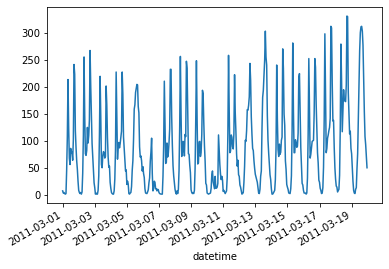

In [46]:
df_bike.loc['2011-03-01':'2011-03-31']['count'].plot()

<AxesSubplot:xlabel='datetime'>

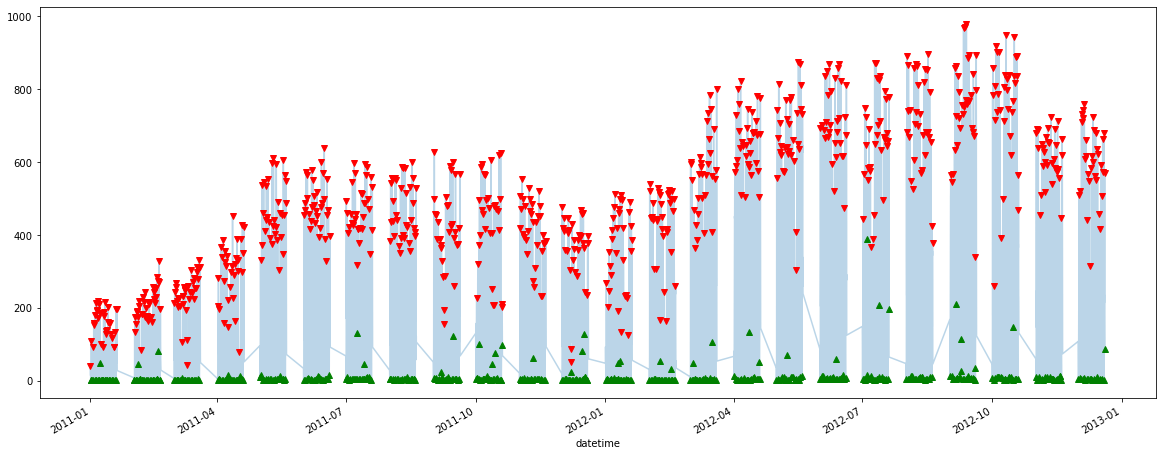

In [47]:
from scipy.signal import argrelextrema

ilocs_min = argrelextrema(df_bike['count'].to_numpy(), np.less_equal, order=6)[0]
ilocs_max = argrelextrema(df_bike['count'].to_numpy(), np.greater_equal, order=6)[0]

df_bike['count'].plot(figsize=(20,8), alpha=.3)
df_bike.iloc[ilocs_max]['count'].plot(style='.', lw=10, color='red', marker="v")
df_bike.iloc[ilocs_min]['count'].plot(style='.', lw=10, color='green', marker="^")

<AxesSubplot:xlabel='datetime'>

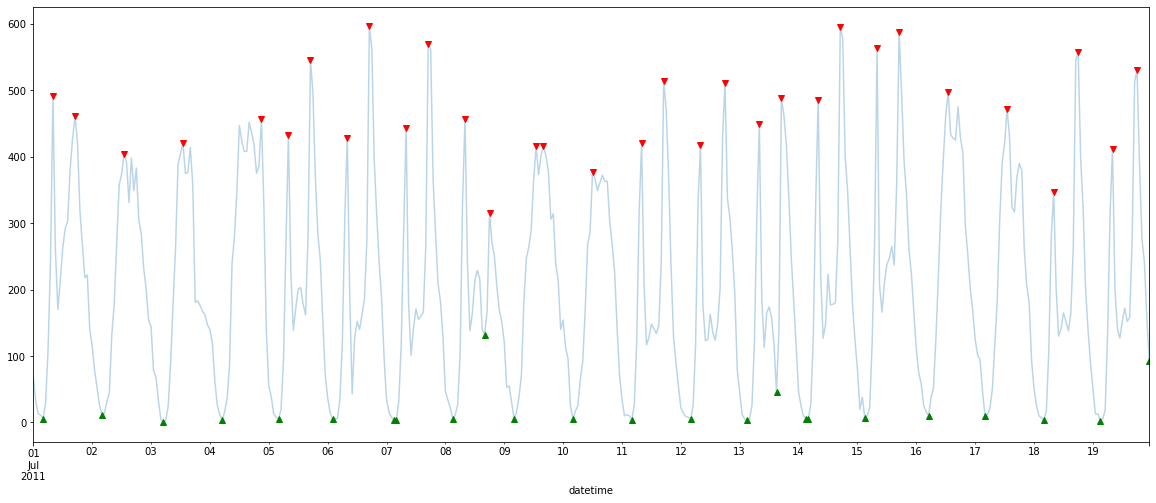

In [48]:


df_test = df_bike.loc['2011-07-01':'2011-07-31']

ilocs_min_ = argrelextrema(df_test['count'].to_numpy(), np.less_equal, order=6)[0]
ilocs_max_ = argrelextrema(df_test['count'].to_numpy(), np.greater_equal, order=6)[0]

df_test['count'].plot(figsize=(20,8), alpha=.3)
df_test.iloc[ilocs_max_]['count'].plot(style='.', lw=10, color='red', marker="v")
df_test.iloc[ilocs_min_]['count'].plot(style='.', lw=10, color='green', marker="^")

In [49]:
df_max = df_bike.iloc[ilocs_max]
df_min = df_bike.iloc[ilocs_min]

In [50]:
peak_hours = df_max.reset_index()['datetime'].dt.hour
dip_hours = df_min.reset_index()['datetime'].dt.hour

In [51]:
peak_hours.value_counts()

8     308
17    239
18     79
13     40
15     28
12     26
14     21
16     17
19      5
11      4
7       2
21      2
1       1
10      1
Name: datetime, dtype: int64

In [52]:
dip_hours.value_counts()

4     203
3     166
5      76
2      69
6      17
14     16
1       9
15      9
16      5
12      3
7       2
13      2
11      1
21      1
23      1
Name: datetime, dtype: int64

In [53]:
df_bike['peak_hour'] = np.nan
df_bike['dip_hour'] = np.nan

In [54]:
df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "08:00:00", 'peak_hour'] = 3
df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "17:00:00", 'peak_hour'] = 3

df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "18:00:00", 'peak_hour'] = 2
df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "13:00:00", 'peak_hour'] = 2

df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "15:00:00", 'peak_hour'] = 1
df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "12:00:00", 'peak_hour'] = 1
df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "14:00:00", 'peak_hour'] = 1
df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "16:00:00", 'peak_hour'] = 1

In [55]:
df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "04:00:00", 'dip_hour'] = 3
df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "03:00:00", 'dip_hour'] = 3

df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "05:00:00", 'dip_hour'] = 2
df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "02:00:00", 'dip_hour'] = 2

df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "06:00:00", 'dip_hour'] = 1
df_bike.loc[df_bike.index.strftime("%H:%M:%S") == "14:00:00", 'dip_hour'] = 1

In [56]:
df_bike.fillna(0, inplace=True)
df_bike['peak_hour'] = df_bike['peak_hour'].astype(int)
df_bike['dip_hour'] = df_bike['dip_hour'].astype(int)

In [57]:
df_bike.head()

,season,workingday,weather,temp,humidity,windspeed,count,busy_day,busy_month,peak_hour,dip_hour
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,9.84,81,0.0,16,2,0,0,0
2011-01-01 01:00:00,1,0,1,9.02,80,0.0,40,2,0,0,0
2011-01-01 02:00:00,1,0,1,9.02,80,0.0,32,2,0,0,2
2011-01-01 03:00:00,1,0,1,9.84,75,0.0,13,2,0,0,3
2011-01-01 04:00:00,1,0,1,9.84,75,0.0,1,2,0,0,3


# Done with the optimization of the time data

In [58]:
df_bike['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [59]:
df_bike.drop(pd.Timestamp('2012-01-09 18:00:00'), inplace=True)

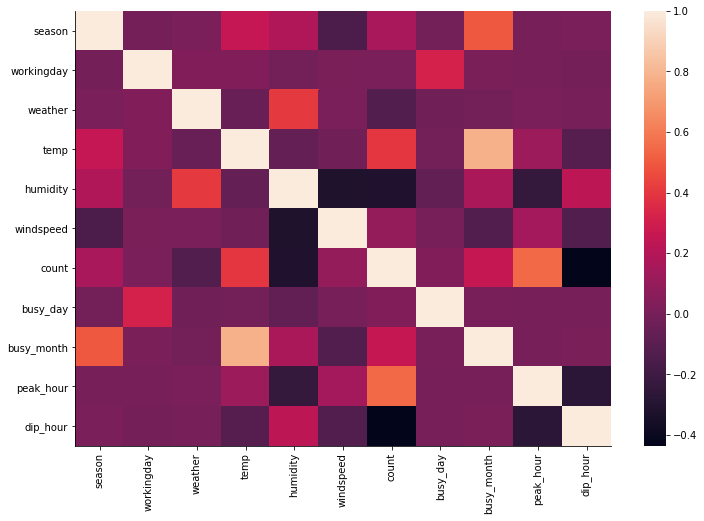

In [60]:
plt.figure(figsize= (12,8))

corr = df_bike.corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr)

sns.despine()

In [61]:
from sklearn.linear_model import LinearRegression

#lr = LinearRegression()
#lr = LinearRegression().fit(,df_bike['count'])
#bias = lr.predict(df_bike.index.tolist())

df_bias = df_bike

In [62]:
df_bias.reset_index(inplace=True)

In [63]:
x = np.arange(df_bias['datetime'].size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
fit = np.polyfit(x, df_bias['count'], 4)
fit_fn = np.poly1d(fit)

In [64]:
fit_fn

poly1d([-4.56070177e-13,  9.87641035e-09, -6.97010896e-05,  1.93989550e-01,
       -1.52885188e+01])

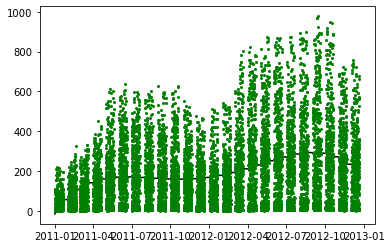

In [65]:
plt.plot(df_bias['datetime'], fit_fn(x), 'k-')
plt.plot(df_bias['datetime'], df_bias['count'], 'go', ms=2)

In [66]:
polyparams = list(fit_fn)

In [67]:
bias =  polyparams[3]*df_bias.index + polyparams[2]*df_bias.index**2 + polyparams[1]*df_bias.index**3 + polyparams[0]*df_bias.index**4

In [68]:
df_bike['bias'] = bias

In [69]:
df_bike.set_index('datetime', inplace=True)

In [70]:
df_bike

,season,workingday,weather,temp,humidity,windspeed,count,busy_day,busy_month,peak_hour,dip_hour,bias
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,9.84,81,0.0000,16,2,0,0,0,0.000000
2011-01-01 01:00:00,1,0,1,9.02,80,0.0000,40,2,0,0,0,0.193920
2011-01-01 02:00:00,1,0,1,9.02,80,0.0000,32,2,0,0,2,0.387700
2011-01-01 03:00:00,1,0,1,9.84,75,0.0000,13,2,0,0,3,0.581342
2011-01-01 04:00:00,1,0,1,9.84,75,0.0000,1,2,0,0,3,0.774844
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,1,15.58,50,26.0027,336,1,1,0,0,189.060879
2012-12-19 20:00:00,4,1,1,14.76,57,15.0013,241,1,1,0,0,188.895928
2012-12-19 21:00:00,4,1,1,13.94,61,15.0013,168,1,1,0,0,188.730835


# Feature engineering

In [71]:
df_bike['year'] = np.nan

In [72]:
df_bike.loc[df_bike.index.strftime("%Y") == '2011', 'year'] = 0
df_bike.loc[df_bike.index.strftime("%Y") == '2012', 'year'] = 1
df_bike['year'] = df_bike['year'].astype(int)

In [73]:
df_bike

,season,workingday,weather,temp,humidity,windspeed,count,busy_day,busy_month,peak_hour,dip_hour,bias,year
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,9.84,81,0.0000,16,2,0,0,0,0.000000,0
2011-01-01 01:00:00,1,0,1,9.02,80,0.0000,40,2,0,0,0,0.193920,0
2011-01-01 02:00:00,1,0,1,9.02,80,0.0000,32,2,0,0,2,0.387700,0
2011-01-01 03:00:00,1,0,1,9.84,75,0.0000,13,2,0,0,3,0.581342,0
2011-01-01 04:00:00,1,0,1,9.84,75,0.0000,1,2,0,0,3,0.774844,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,1,15.58,50,26.0027,336,1,1,0,0,189.060879,1
2012-12-19 20:00:00,4,1,1,14.76,57,15.0013,241,1,1,0,0,188.895928,1
2012-12-19 21:00:00,4,1,1,13.94,61,15.0013,168,1,1,0,0,188.730835,1


In [74]:
from sklearn.model_selection import train_test_split

X = df_bike.drop('count', axis=1)
y = df_bike['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer

column_transformer = ColumnTransformer([
    ('hot_one_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['season', 'weather', 'busy_day', 'busy_month', 'peak_hour', 'dip_hour']),
    ('num_scaler', MinMaxScaler(), ['temp', 'humidity', 'windspeed', 'bias'])
])

column_transformer.fit(X_train)
X_train_fe = column_transformer.transform(X_train)
X_test_fe = column_transformer.transform(X_test) # DO NOT FIT ON TEST DATA

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train_fe, y_train)

y_pred = np.abs(lr.predict(X_test_fe))

In [77]:
print(lr.score(X_train_fe, y_train))
print(lr.score(X_test_fe, y_test))

0.5801423658375046
0.5726723803837619


In [78]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.5774050563768204


In [79]:
df_pred = X_test
df_pred.drop(df_pred.columns.tolist(), axis=1, inplace=True)
df_pred['count_true'] = y_test
df_pred['count_pred'] = y_pred.astype(int)
df_pred.head(1)

/home/dietmar/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-79-9add77025a18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['count_true'] = y_test
<ipython-input-79-9add77025a18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,count_true,count_pred
datetime,,
2011-07-19 11:00:00,127,209


<AxesSubplot:xlabel='datetime'>

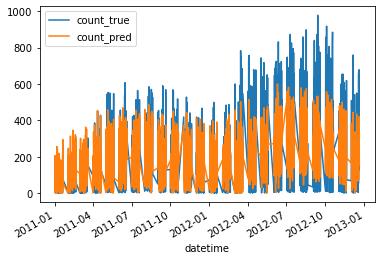

In [456]:
df_pred.sort_index().plot()

In [80]:
# Kaggle score: RMSLE
from sklearn.metrics import mean_squared_log_error

kaggle_score = np.sqrt(mean_squared_log_error(y_test, y_pred))
kaggle_score

1.091185189167971

In [107]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=10, n_estimators=100).fit(X_train_fe, y_train)

y_pred = rf.predict(X_test_fe)

print(rf.score(X_train_fe, y_train))
print(rf.score(X_test_fe, y_test))

0.8101469673819512
0.7006007965814618


/home/dietmar/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-108-dee169118a3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['count_true'] = y_test
<ipython-input-108-dee169118a3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

<AxesSubplot:xlabel='datetime'>

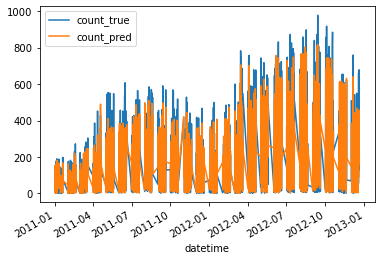

In [108]:
df_pred = X_test
df_pred.drop(df_pred.columns.tolist(), axis=1, inplace=True)
df_pred['count_true'] = y_test
df_pred['count_pred'] = y_pred.astype(int)
df_pred.head(1)

df_pred.sort_index().plot()

In [109]:
from sklearn.metrics import mean_squared_log_error

kaggle_score = np.sqrt(mean_squared_log_error(y_test, y_pred))
kaggle_score

0.7504896457421828